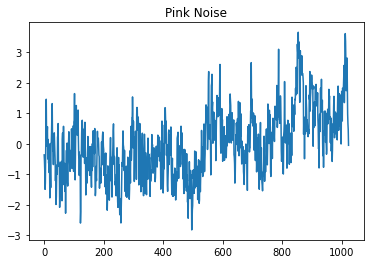

<ipython-input-112-d4645b5f5b11>:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * .0013888694722936634, np.abs(np.fft.rfft(s)),'.') #mult times cadence


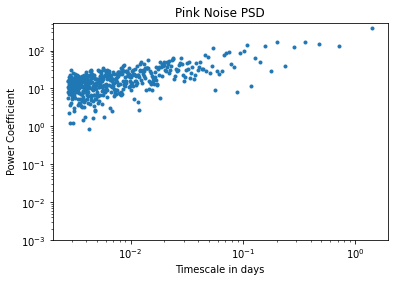

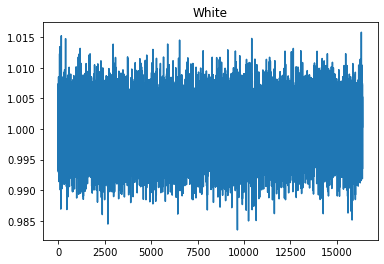

<ipython-input-112-d4645b5f5b11>:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * .0013888694722936634, np.abs(np.fft.rfft(s)),'.') #mult times cadence


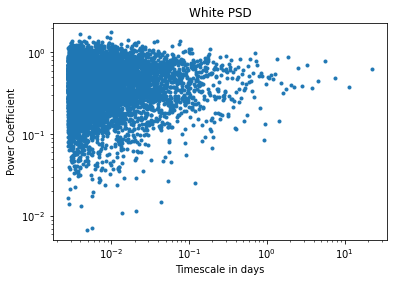

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import pandas as pd
import matplotlib.tri as tri


def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    #plt.tricontour(1/f * .0013888694722936634, np.abs(np.fft.rfft(s)))
    plt.loglog(1/f * .0013888694722936634, np.abs(np.fft.rfft(s)),'.') #mult times cadence
    plt.xlabel("Timescale in days") ## for 1/f
    plt.ylabel("Power Coefficient")
#1/f * 0.02083337081285208
def noise_psd(N, psd = lambda f: 1):
        X_white = np.fft.rfft(np.random.randn(N)); 
        S = psd(np.fft.rfftfreq(N))
        S = S / np.sqrt(np.mean(S**2))
        X_shaped = X_white * S;
        return np.fft.irfft(X_shaped);

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1;

@PSDGenerator
def blue_noise(f):
    return np.sqrt(f);

@PSDGenerator
def violet_noise(f):
    return f;

@PSDGenerator
def brownian_noise(f):
    return 1/np.where(f == 0, float('inf'), f)

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))

#plt.figure(figsize=(8, 8))
#for G in [pink_noise]:
#     plot_spectrum(G(2**14))
# plt.legend(['pink'])
#plt.ylim(-50,300)

pink_noise=pink_noise(2**10)
white_noise=white_noise(2**14)
white_noise=[point * 0.004092449222912115 + 1 for point in white_noise]


plt.plot(pink_noise)
plt.title("Pink Noise")
plt.show()
plt.title("Pink Noise PSD")
plot_spectrum(pink_noise)
plt.ylim([1e-3, None]);

plt.show()

plt.plot(white_noise)
plt.title("White")
plt.show()
plt.title("White PSD")
plot_spectrum(white_noise)
#plt.ylim([1e-3, None]);

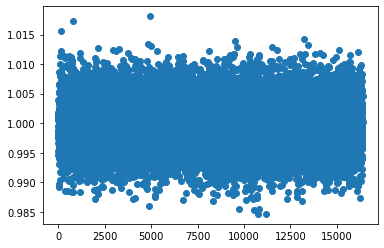

std deviation white noise:  0.00407319369365204


<ipython-input-96-1a327aa09fb7>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * .0013888694722936634, np.abs(np.fft.rfft(s)),'.') #mult times cadence


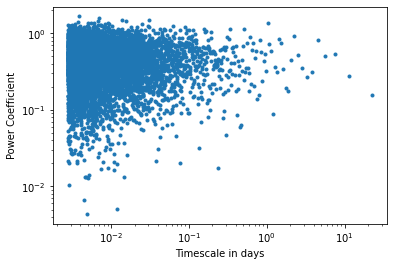

In [98]:
k =np.vstack((white_noise,np.arange(0,len(white_noise),1))) #this gives white noise a y value, which i don't end up needing
plt.scatter(k[1,:],k[0,:])
plt.show()
print("std deviation white noise: " , np.std(white_noise))
plot_spectrum(white_noise)


18279


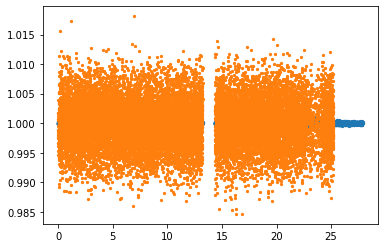

<ipython-input-110-d4645b5f5b11>:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * .0013888694722936634, np.abs(np.fft.rfft(s)),'.') #mult times cadence
<ipython-input-110-d4645b5f5b11>:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * .0013888694722936634, np.abs(np.fft.rfft(s)),'.') #mult times cadence


cadence in days:  0.0013888694722936634
Tess len:  18279
White noise len:  16384
standard dev tess:  0.00012410610390559585
standard dev white:  0.00407319369365204


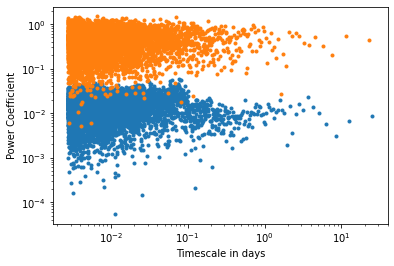

In [111]:
#normalized tesscurve
ttv = lk.search_lightcurve('TIC 261136679', cadence = "short").download_all(quality_bitmask='hard')
#388857263 proxima
#261136679 short one
lc=ttv[0].flatten().to_pandas()
lc.reset_index(inplace=True)
flux= lc["flux"]
time = lc["time"] #time starts at >1000

time_start_0 = [value - time[0] for value in time]
print(len(time_start_0))


data = pd.DataFrame({"flux": flux, "time": time})
plt.scatter(time_start_0,flux, s = 5) #blue is TESS #time_start_0
plt.scatter(time_start_0[0:16384],k[0,:], s=5) #orange is PSDGenerator white noise
plt.show()

plot_spectrum(flux) #plot as a line 1/frequencies # blue
plot_spectrum(white_noise) #orange
cadence = time[1]-time[0]

print("cadence in days: " , cadence) #in days
print("Tess len: " , len(flux))
print("White noise len: " , len(k[0,:]))

print("standard dev tess: " , np.std(flux)) ### fix cadences
print("standard dev white: ", np.std(k[0,:]))


16384


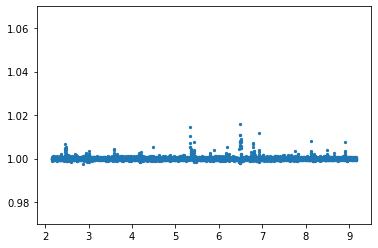

<ipython-input-96-1a327aa09fb7>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * .0013888694722936634, np.abs(np.fft.rfft(s)),'.') #mult times cadence


cadence in days:  0.001388925551509601
Tess len:  16384
White noise len:  16384
standard dev tess:  0.004092449222912115
standard dev white:  0.00407319369365204


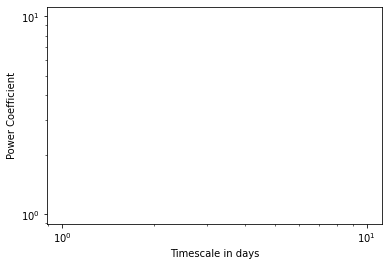

In [106]:
#normalized tesscurve
ttv = lk.search_lightcurve('TIC 388857263', exptime = "short").download_all(quality_bitmask='hard')
#388857263 proxima
#261136679 short one
lc=ttv[0].flatten().to_pandas()
lc.reset_index(inplace=True)
flux= lc["flux"]
time = lc["time"] #time starts at >1000

time_start_0 = [value - time[0] for value in time] #make days start at 0
print(len(time))


data = pd.DataFrame({"flux": flux, "time": time})
plt.scatter(time_start_0[0:5461],flux[0:5461], s = 5) #blue is TESS #time_start_0
#plt.scatter(time_start_0[0:16384],k[0,:], s=5) #orange is PSDGenerator white noise
plt.ylim(.97,1.07)
plt.show()

plot_spectrum(flux[0:5461]) #plot as a line 1/frequencies # blue
#plot_spectrum(white_noise) #orange
cadence = time[1]-time[0]

print("cadence in days: " , cadence) #in days
print("Tess len: " , len(flux))
print("White noise len: " , len(k[0,:]))
print("standard dev tess: " , np.std(flux)) ### fix cadences
print("standard dev white: ", np.std(k[0,:]))


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

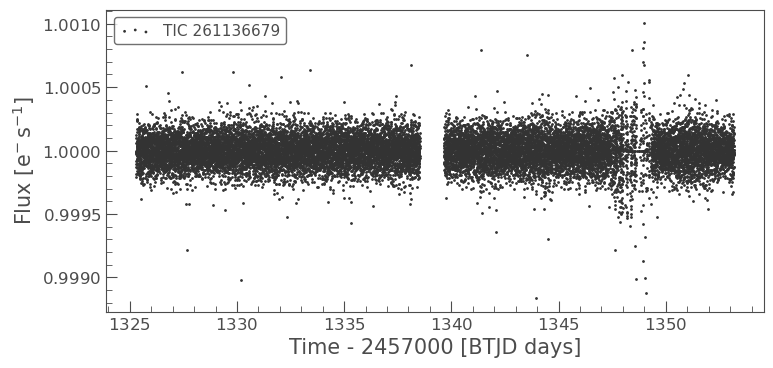

In [62]:
ttv[0].flatten().scatter()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

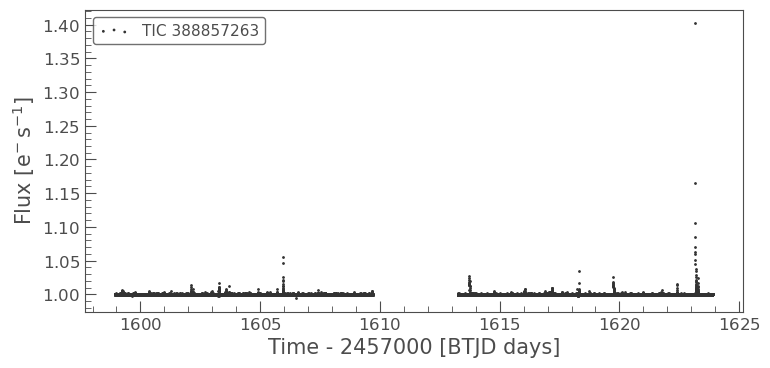

In [107]:
ttv[0].flatten().scatter()


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

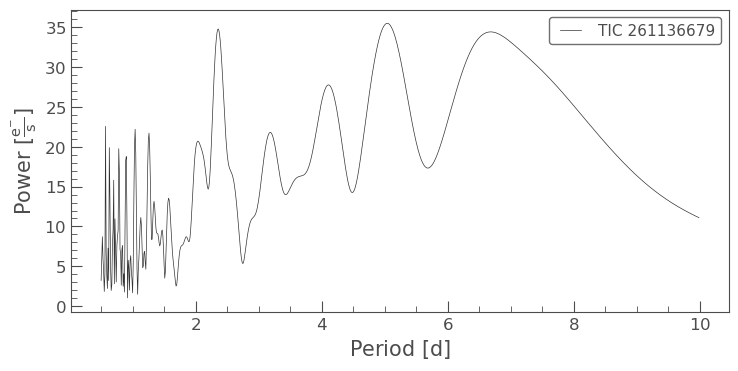

In [56]:
psd_tess = ttv[0].to_periodogram(method='ls',period=np.arange(.5,10,.01))
psd_tess.plot()

<ipython-input-2-d2ca73d5d4cd>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f, np.abs(np.fft.rfft(s)),'.') #mult times cadence


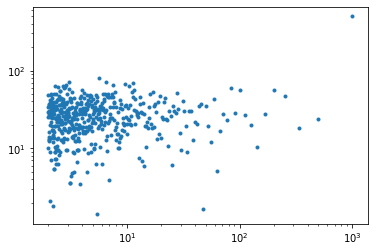

In [3]:
# new_noise = []
# for i in np.linspace(0,6.28,1000):
#     new_noise.append(np.sin(i)+ np.random.normal())
# #print(new_noise)    
# plot_spectrum(new_noise)
